# 1.监督学习
## 1.1 广义线性模型

下面是一组用于回归的方法，其中目标值将是输入变量的线性组合。在数学概念中，如果$\hat{y}$是预测值,  
$$\hat{y}(\omega,x)=\omega_0+\omega_1x_1+\cdots+\omega_nx_n$$
在程序模块中，我们对于系数向量$\omega=(\omega_1,\cdots,\omega_p)$记作 $coef\_$,截距项$\omega_0$记作 $intercept\_$.  
若用广义线性模型进行分类，见logistic回归。

### 1.1.1 普通最小二乘
线性回归最小化数据中观察到的响应和通过线性逼近预测的响应之间的残差平方和来拟合系数为$\omega=(\omega_1,\cdots,\omega_p)$的线性模型。从数学上来说，它解决了形式上的问题：  
$$ \min\limits_{\omega}\lVert X\omega - y \rVert_2^2$$
线性回归对数组x，y使用fit方法和存储线性模型的系数向量在coef_成员中：

In [1]:
from sklearn import linear_model
reg=linear_model.LinearRegression()#创建回归函数
reg.fit([[0,0],[1,1],[2,2]],[0,1,2])#拟合模型
print(reg.coef_) #输出系数向量

[ 0.5  0.5]


然而，普通最小二乘的系数估计依赖于模型项的独立性。当各项具有相关性且设计矩阵x的列具有近似线性相关时，设计矩阵接近于奇异，因此，最小二乘估计变得对所观察到的响应中的随机误差高度敏感，产生大的方差。这种情况可能出现多重共线性，例如，没有实验设计而进行数据集收集。

## Linear Regression Example
本例仅使用糖尿病数据集的第一个特征，以说明这种回归技术的二维图。在图中可以看到直线，说明线性回归如何绘制一条直线，使真实和预测的数据之间残差平方最小。  
除此之外还计算了系数、残差平方和和方差得分。

In [27]:
%matplotlib inline

Automatically created module for IPython interactive environment
系数为: 938.238 常数项为:152.92
均方差为:2548.072
方差分数为:0.47


<function matplotlib.pyplot.show>

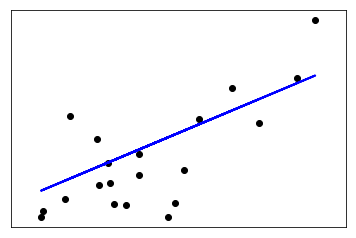

In [42]:
print(__doc__)


# Code source: Jaques Grobler
# License: BSD 3 clause

import matplotlib.pyplot as plt
import numpy as np
from sklearn import datasets, linear_model
from sklearn.metrics import mean_squared_error,r2_score

# Load the diabetes dataset
diabetes=datasets.load_diabetes()
# use only one feature
#newaxis的功能是插入新维度，在行或列上, 2指的是第三列数据
diabetes_X=diabetes.data[:, np.newaxis, 2]
# split the data into training/testing sets
diabetes_X_train=diabetes_X[:-20] #除去后20个的值
diabetes_X_test=diabetes_X[-20:] #后20个的数值

# split the targets into training/testing data
diabetes_y_train=diabetes.target[:-20]
diabetes_y_test=diabetes.target[-20:]
#create linear regression object
regr=linear_model.LinearRegression()
regr.fit(diabetes_X_train,diabetes_y_train)
# Make predictions using testing set
diabetes_y_pred=regr.predict(diabetes_X_test)

#coefficients
print("系数为: %.3f"% regr.coef_,'常数项为:%.2f'%regr.intercept_)
print('均方差为:%.3f'% mean_squared_error(diabetes_y_test,diabetes_y_pred))
print('方差分数为:%.2f'% r2_score(diabetes_y_test,diabetes_y_pred))

# plot outputs
plt.scatter(diabetes_X_test,diabetes_y_test, color='black')
plt.plot(diabetes_X_test,diabetes_y_pred,color='blue',linewidth=2)

plt.xticks(()) #设置坐标刻度
plt.yticks(())

plt.show

#### 1.1.1.1 普通最小二乘复杂性
该方法用X的奇异值分解来计算最小二乘解，如果X是一个维数为(n,p)的矩阵，假定$n\ge p$这个方法的代价是$O(np^2)$。

### 1.1.2 岭回归 
岭回归通过对系数大小施加惩罚，解决了普通最小二乘法的一些问题。岭系数最小化惩罚残差平方和：  
$$ \min\limits_{\omega}\lVert Xw-y \rVert _2^2+\alpha \lVert \omega \rVert _2^2$$
这里，$\alpha\ge0$是控制收缩量的复杂参数:$\alpha$值越大，收缩量越大，从而系数对于共线性更加稳健。  
与其他线性模型一样，Ridge对数组x，y使用fit方法和存储线性模型的系数向量$\omega$在coef_成员中:

In [5]:
from sklearn import linear_model
reg=linear_model.Ridge(alpha= .5)
reg.fit([[0,0],[0,0],[1,1]],[0,.1,1])
print(reg.coef_)
print(reg.intercept_)

[ 0.34545455  0.34545455]
0.136363636364


## 绘制岭系数作为正则化的函数
在系数估计中显示共线性影响。  
岭回归是本例中使用的估计量。每种颜色代表系数向量的不同特征，这显示为正则化参数的函数。 
这个例子也说明了岭回归用于病态矩阵的有用性。对于这样的矩阵，目标变量的微小变化会导致计算权重的巨大差异。在这种情况下，设置某种正则化（$\alpha$）来减少这种变化（噪声）是有用的。  
当$\alpha$非常大时，正则化效应支配平方损失函数并且系数趋于零。在路径的末端，$\alpha$趋于零，解趋于普通最小二乘，系数表现出大的振荡。在实践中，有必要对$\alpha$进行调整，使两者之间保持平衡。

Automatically created module for IPython interactive environment


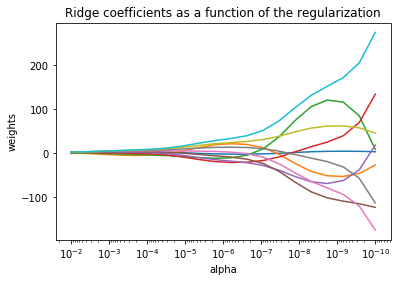

In [33]:
print(__doc__)

import numpy as np
import matplotlib.pyplot as plt
from sklearn import linear_model

# X is the 10*10 Hilbert matrix
X=1./(np.arange(1,11)+np.arange(0,10)[:,np.newaxis])
y=np.ones(10)

#####################
#compute paths

n_alphas=20
alphas=np.logspace(-10,-2,n_alphas)

coefs=[]
for a in alphas:
    ridge=linear_model.Ridge(alpha=a,fit_intercept=False)
    ridge.fit(X,y)
    coefs.append(ridge.coef_)
    
##########
# Display results

ax=plt.gca()

ax.plot(alphas,coefs)
ax.set_xscale('log')
ax.set_xlim(ax.get_xlim()[::-1]) #reverse axis
plt.xlabel('alpha')
plt.ylabel('weights')
plt.title('Ridge coefficients as a function of the regularization')
plt.axis('tight')
plt.show()

#### 1.1.2.2 设置正则化参数：广义交叉验证
RidgeCV 实现岭回归的$\alpha$参数内置交叉验证。对象的工作方式和GridSearchCV基本相同，留一交叉验证的一个有效形式：  

In [8]:
from sklearn import linear_model
reg=linear_model.RidgeCV(alphas=[0.1,1.0,10.0])
reg.fit([[0,0],[0,0],[1,1]],[0,.1,1])
print(reg.alpha_)
print(reg.coef_)
print(reg.intercept_)

0.1
[ 0.44186047  0.44186047]
0.0720930232558


array([[ 1.],
       [ 1.]])